# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model. 
    - A simple linear regression model has one independent variable and we use this to predict the dependent variable on a straight line.
- What type of machine learning is linear regression? 
    - linear regression is a machine learning model based on an algorithm. 
- What is a “line of best fit” using the OLS method?
    - A Line of best fit is a straight line that shows the best approximation of a scatter plot of data points. This method is used to study the nature of the relationship between those points.  It helps to study the nature of the relationship between those points. 
- What is the difference between correlation and regression?
    - Regression is equation based, and can help quantify relationships between variables using an equation. Correlation measures the degree of relationship between variables.
- Describe a scenario when you would use linear regression and why you would use it. 
    - Linear regression could be used in a scenario where you are looking at numeric variables because it is able to show relationships between numerical data. 


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity: Linearity assumes that a relationship exists between the dependent and the independent variables.
- Normality: Normality assumes the variables of the model have normal distribution. 
- Homoscedasticity: The variables have constant variance at every level of x.
- No multicollinearity: No multicollinearity assumes that there is little or no multicollinearity in the data so that the  independent variables would avoid being too highly correlated with each other.
- No endogeneity: No endogeneity refers to the lack of a link between the independent variables and the errors.
- No autocorrelation: The variables are independent and there is no correlation between consecutive variables in time series data.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0): Beta zero refers to the value of Y when X=0. 
- Coefficient of Independent Variable (B1): B1 is the slope, the change in y when x changes 1 unit. 
- Standard Error: The standard error is the standard deviation of the sampling distribution or an estimate of that standard deviation. 
- T-Statistic: The t-statistic is the estimated value of a parameter from its hypothesized value to its standard error.
- P-Value of T-Statistic (from the independent variable): The p-value can tell how likely it is that your data could have occurred under the null hypothesis. 


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared: R-squared is a percentage between 0 and 100, with 100 signaling perfect correlation and zero no correlation at all.
- Adjusted R-squared: Adjusted R-squared is a type of R-squared that adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements.


# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [28]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
%matplotlib inline

sns.set()
from sklearn.linear_model import LinearRegression

In [3]:
# load data
df = pd.read_csv('house_data.csv')

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [4]:
# explore data below (you will need to make new cells)

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0    5650.0     1.0           0     1                3    7.0      1180.0   
1    7242.0     2.0           0     1                3    7.0      2170.0   
2   10000.0     1.0           0     1                3    6.0       770.0   
3    5000.0     1.0           0     1                5    7.0      1050.0   
4    8080.0     1.0           0     1                3    8.0      1680.0   

   sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0              0      1955.0  98178.0  47.5112 -122.257            1340  
1            400      1951.0  98125.0  47.7210 -122.319            1690  
2              0      1933.0  98028.0  47.7379 -122.233            2720  
3            910      1965.0  98136.0  47.5208 -122.393            1360  
4              0      1987.0  98074.0  47.6168 -122.045            1800

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

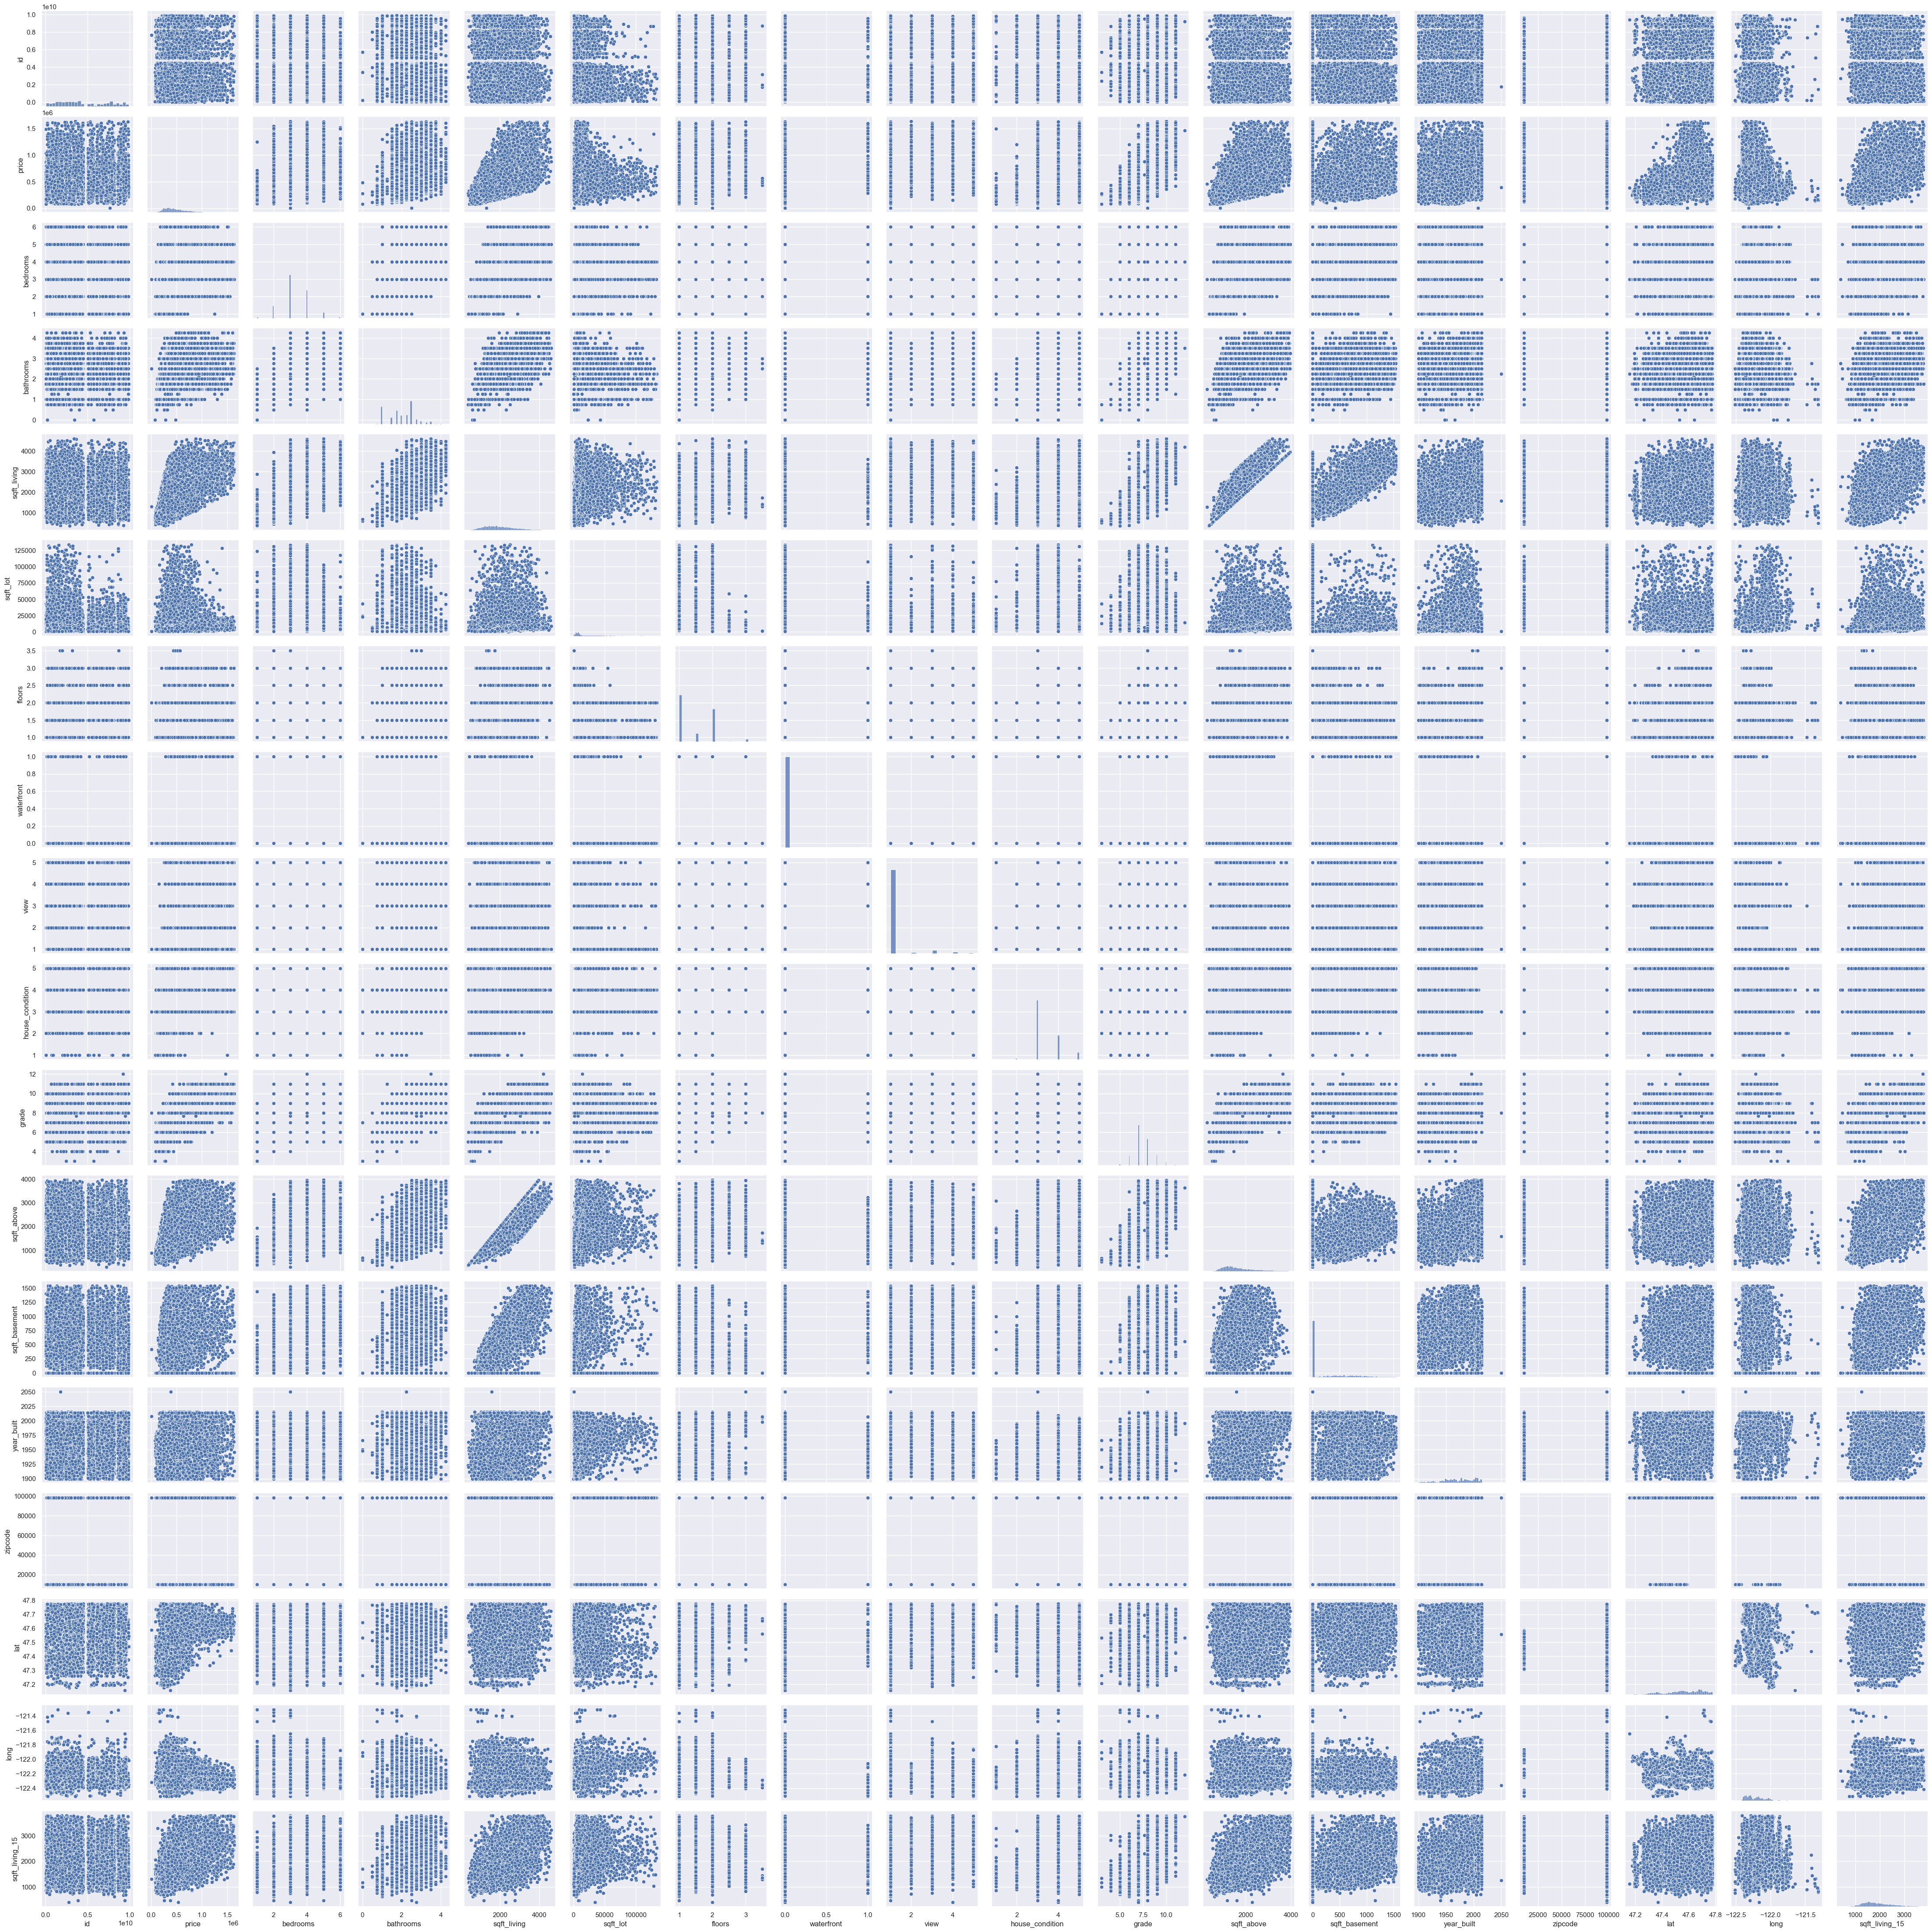

In [12]:
sns.pairplot(df)

In [34]:
df = df[['price', 'sqft_living', 'sqft_lot','sqft_basement', 'year_built', 'grade', 'view']].copy()

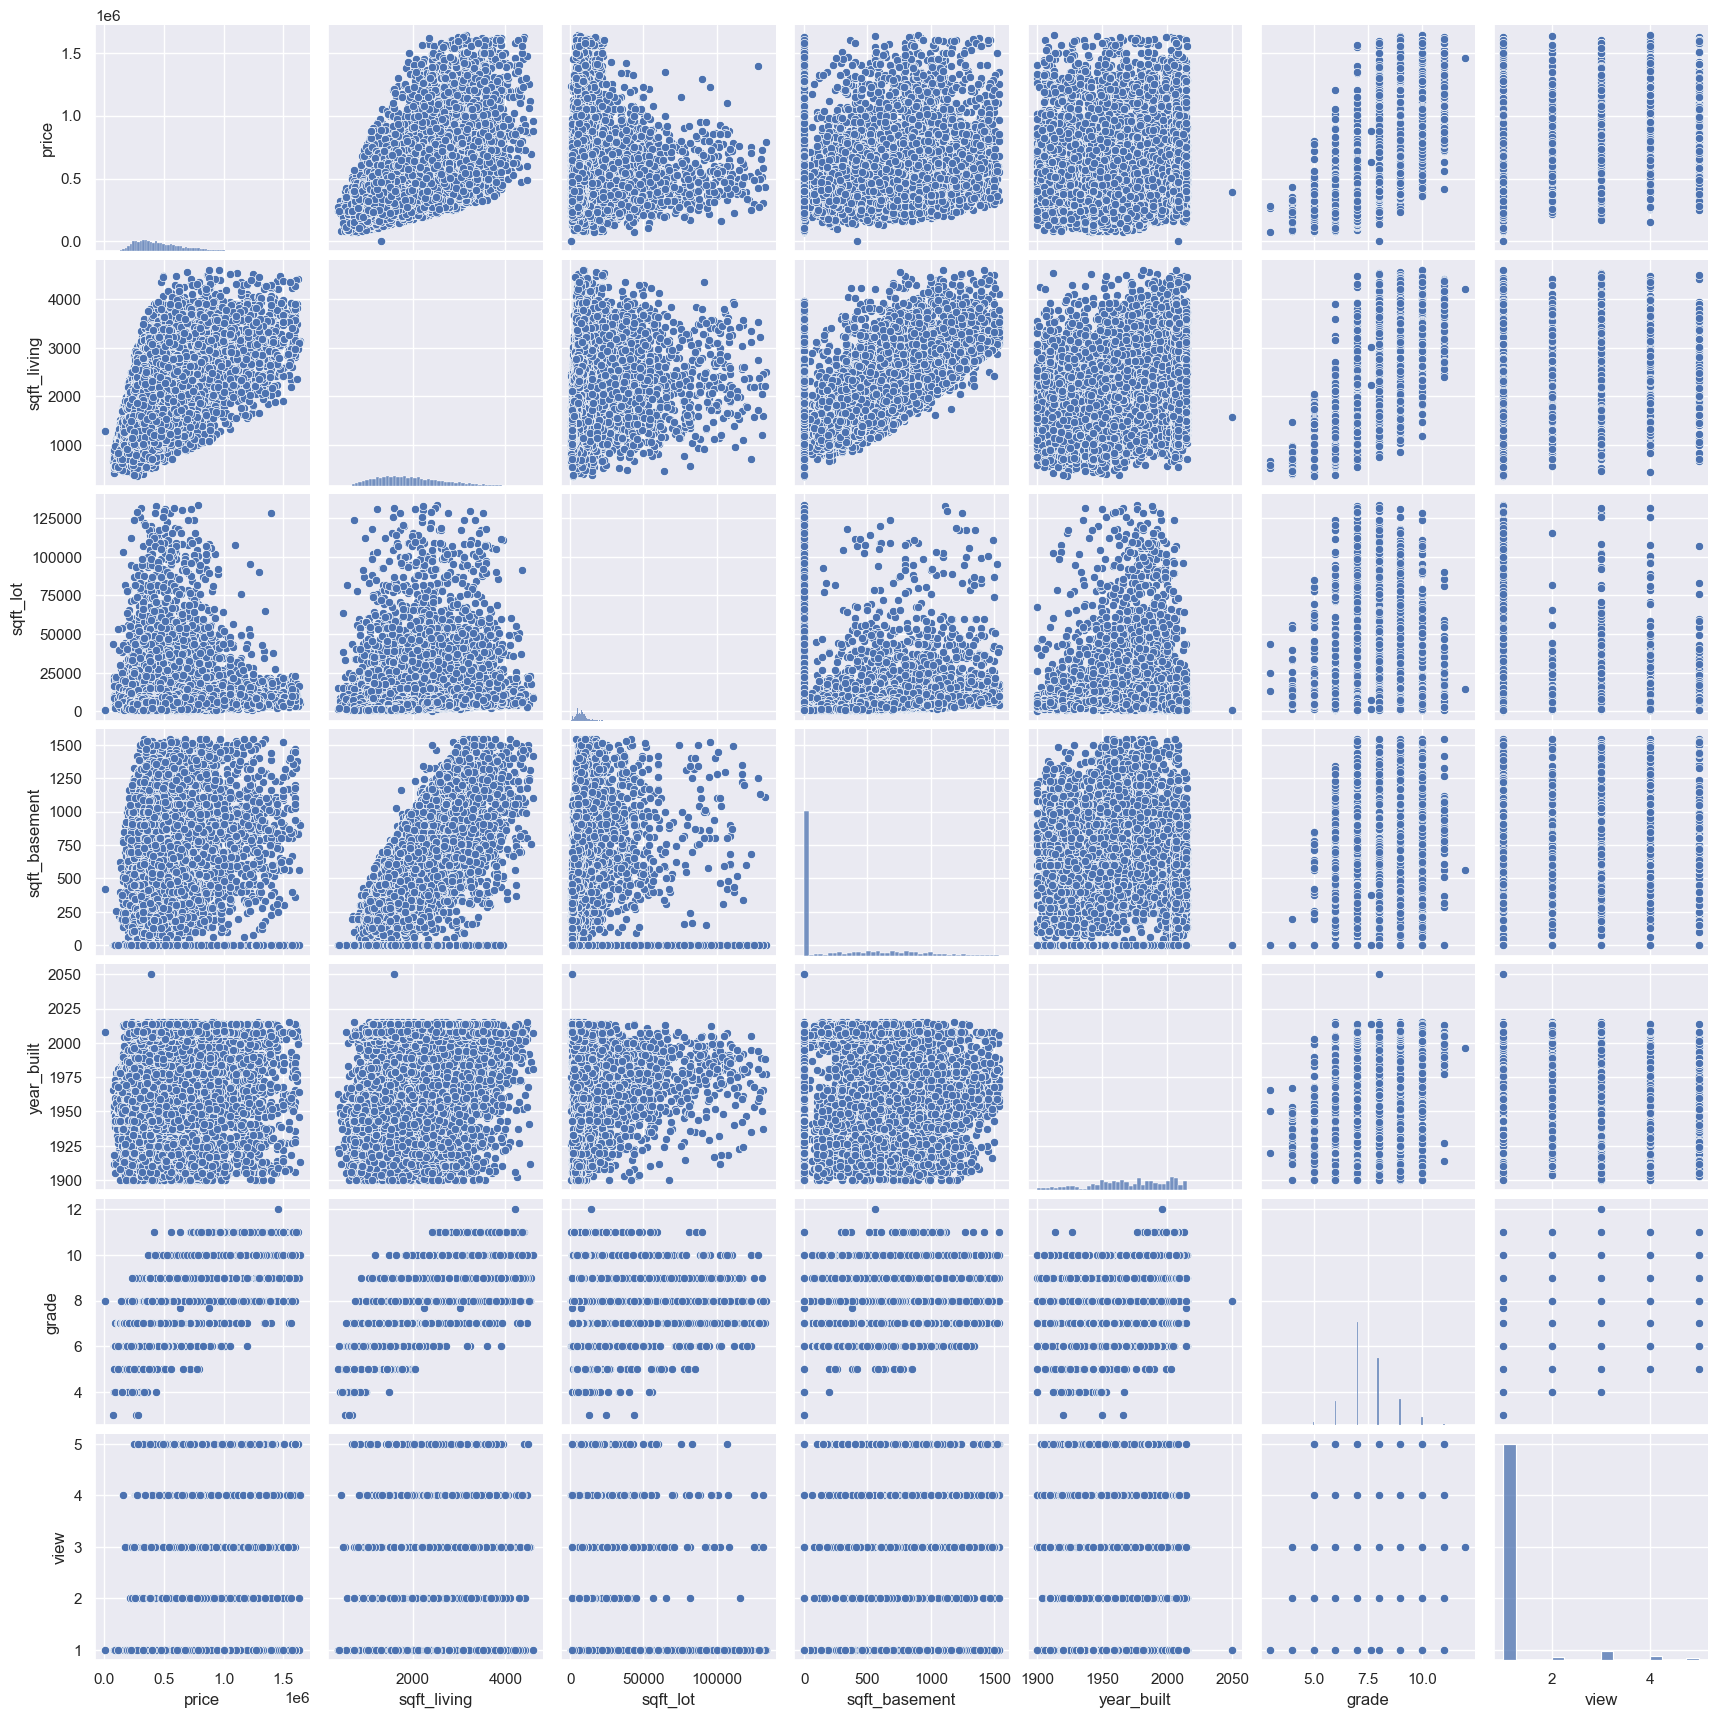

In [35]:
sns.pairplot(df)

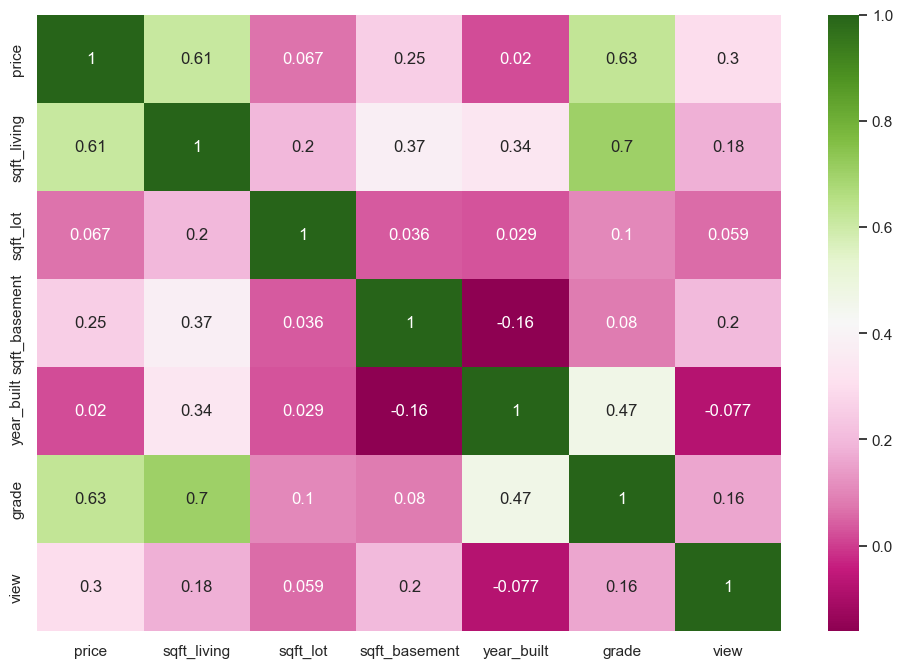

In [36]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(df.corr(), annot=True, cmap='PiYG')

### Step 3: Determine independent and dependent variable

In [23]:
# set X 
x1 = df['sqft_living']

# set Y 
y = df['price']

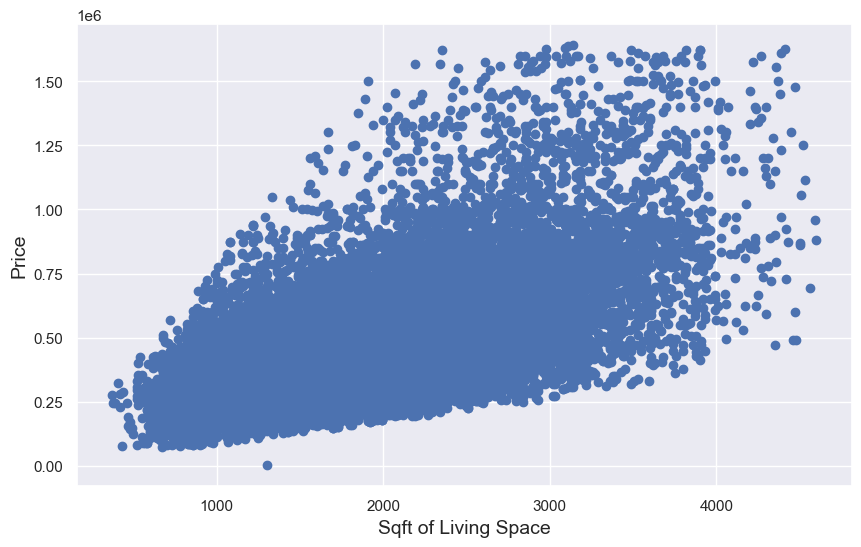

In [24]:
# visualize relationship between X and Y
plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.xlabel('Sqft of Living Space', fontsize=14)
plt.ylabel('Price', fontsize=14);

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [8]:
# fit model to X and Y variables (you will need to make more cells)

In [32]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:47:47   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [9]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared 
    - The R-Squared value in our model is 0.376 which means that approximately 38% of the variance observed in the target variable(or the dependent variable which is price) is explained by the regression model. 
- Coefficient of independent variable
    - The coef of sqft_living is 202.9775 which indicates there is a positive relationship between the variables so as the independent variable increases, the dependent variable also increases. As Sqft living goes up, so does price. 
- P-value of T-statistic
    - We see that the p-value of T-statistics is 0.00 (threshold <0.05) which means we can reject the null hypothesis and consider this statistically significant. 
- P-value of F-statistic
    - The p-value of F-statistic is 0.00 which means it is a good indicator or statistically signigicant indicator that our variable is related with the output.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [37]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1500, 2000]})
new_df

constant  sqft_living
0         1         1500
1         1         2000

In [38]:
predictions = results.predict(new_df)
predictions

0    396595.022459
1    498083.790031
dtype: float64

In [39]:
new_df['price_per_sqft_prediction'] = results.predict(new_df)
new_df

constant  sqft_living  price_per_sqft_prediction
0         1         1500              396595.022459
1         1         2000              498083.790031

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [49]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

y = df['price']
x1 = df[['sqft_living', 'view']]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [50]:
# fit new regression model (you will need to make more cells)
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     7165.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:32:25   Log-Likelihood:            -2.7700e+05
No. Observations:               20456   AIC:                         5.540e+05
Df Residuals:                   20453   BIC:                         5.540e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.165e+04   4055.559      7.804      0.000    2.37e+04    3.96e+04
sqft_living   191.5220      1.805    106.135      0.000     187.985     195.059
view         7.016e+04   1977.099     35.485      0.000    6.63e+04     7.4e+04
==============================================================================
Omnibus:                     3464.013   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7724.309
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                       5.274   Cond. No.                     6.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.

- R-squared 
    - The R-Squared value in our model is 0.412 which means that approximately 41% of the variance observed in the target variable(or the dependent variable which is price) is explained by the regression model. 
- Coefficient of independent variable
    - The coef of view 7.016e+04 indicates there is a positive relationship between the variables so as the independent variable (view)increases, the dependent variable also increases. As view value goes up, so does price. 
- P-value of T-statistic
    - We see that the p-value of T-statistics is 0.00 (threshold <0.05) which means we can reject the null hypothesis and consider this relationship between view, sqft_living, and price statistically significant. 
- P-value of F-statistic
    - The p-value of F-statistic is 0.00 which means it is a good indicator or statistically signigicant indicator that our variables are related with the output.

The R-Squared and Adjusted R-Squared values are the same, 0.412. The adjusted R-square would penalize you for adding features which are not useful for predicting the target, so we can feel confident that the values we chose are meaningul values. 

If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

#Write a paragraph detailing your observations between the simple linear regression model which had one independent variable and the multiple linear regression model which had two independent variables. Based on the outputs from the models you created, which do you think will more accurately predict new data points and why?
- The multiple linear regression model will likely predict new data points accurately, because it will take in to consideration other variables which have an impact on the whole model and we also see our R-square value go up as we added a new variable.  

### Step 4: Predict Values

In [15]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [54]:
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1000, 1000, 1500, 1500],'view':[0,1,0,1]})
new_df

constant  sqft_living  view
0         1         1000     0
1         1         1000     1
2         1         1500     0
3         1         1500     1

In [55]:
new_df['price_change_data'] = results.predict(new_df)
new_df

constant  sqft_living  view  price_change_data
0         1         1000     0      223172.402204
1         1         1000     1      293329.084842
2         1         1500     0      318933.421905
3         1         1500     1      389090.104543

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [16]:
# create new markdown cell and write down your observations

The difference seen between linear and multiple regression models in our example is that a multiple linear regression model gave a better picture of the overall weight of the variables on the dependent variable as we can determine from our R-squared value when comparing the two models. 

# Part 4 - Multivariate Time Series Analysis

In [17]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 